
<a id='wald-friedman'></a>
<div id="qe-notebook-header" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>

# Um Problema que Deixou Milton Friedman Perplexo

(e que Abraham Wald resolveu inventando a análise sequencial)


<a id='index-1'></a>

## Conteúdo

- [Um Problema que Deixou Milton Friedman Perplexo](#Um-Problema-que-Deixou-Milton-Friedman-Perplexo)  
  - [Resumo](#Resumo)  
  - [Origem do problema](#Origem-do-problema)  
  - [Uma aproximação da programação dinâmica](#Uma-aproximação-da-programação-dinâmica)  
  - [Implementação](#Implementação)  
  - [Comparação com a formulação de Neyman-Pearson](#Comparação-com-a-formulação-de-Neyman-Pearson)  

> *Devidamente traduzido, revisado e adaptado do [QuantEcon](https://quantecon.org/) pelos bolsistas CNPq, Pedro Luiz H. Furtado e Jonas Aragão M. Corpes, sob supervisão do Prof. Christiano Penna, do CAEN/UFC.*


Feito em co-autoria com Chase Coleman.

## Resumo

Essa aula descreve um problema de decisão estatística encontrado por Milton Friedman e W. Allen Wallis durante a II Guerra Mundial, quando ambos eram analistas do Grupo de Pesquisa Estatística do Governo dos Estados Unidos na Universidade Colúmbia.

Esse problema conduziu Abraham Wald [[Wal47]](https://julia.quantecon.org/../zreferences.html#wald47) a formular a **análise sequencial**, uma aproximação para problemas de decisão estatística intimamente relacionados à programação dinâmica.

Nessa aula, nós aplicamos algorítimos da programação dinâmica ao problema de Friedman, Wallis e Wald.

As idéias básicas podem ser:

- Lei de Bayes;  
- Programação Dinamica;  
- Erros estatísticos do Tipo I e tipo II;  
  - um erro do tipo I ocorre quando você rejeita uma hipótese nula que é verdadeira;  
  - um erro do tipo II é quando você aceita uma hipótese nula que é falsa;  
-  **O teste da razão de probabilidades sequenciais** de Abraham Wald;  
- O **poder** de um teste estatístico;  
- A **região crítica** de um teste estatístico, e  
- Um **teste uniformemente mais poderoso**.  

## Origem do problema

Nas páginas 137-139 do seu livro de 1998, *Two Lucky People* com Rose Friedman [[FF98]](https://julia.quantecon.org/../zreferences.html#friedman98), Milton Friedman descreve um problema apresentado a ele e a Allen Wallis durante a II Guerra Mundial, quando eles trabalhavam no Grupo de Pesquisa Estatística do Governo dos Estados Unidos na Universidade de Columbia.

Vamos ouvir de Milton Friedman o que aconteceu.

“Para entender a história, é necessário ter uma idéia de um problema estatístico simples, e do proocedimento padrão para lidar com ele. O problema real do qual a análise sequencial cresceu servirá. A Marinha tem dois desenhos alternativos (sejam A e B) para um projétil. Quer se determinar qual é superior. Para isso, faz uma série de disparos emparelhados. Em cada rodada se fixa um valor 1 ou 0 para A caso sua performance seja superior ou inferior à B e convertem 0 ou 1 para B. A Marinha pede aos estatísticos como proceder nos testes e analisar os resultados.

“A resposta estatística padrão era especificar um número de disparos (diga-se 1,000) e um par de porcentagens (ex., 53% e 47%) e dizer ao cliete que, se A recebe em 1 mais de 53% dos disparos, pode ser considerado superior; mas se A recebe em 1 menos que 47%, B pode ser considerado superior; se a percentagem fica entre 47% e 53%, nenhum deles pode ser considerado.

“Quando Allen Wallis estava discutindo tal problema com o Capitão Garret L. Schyler, este questionou o teste, pois citar o feito de Allen poderia ser um desperdício. Se um oficial sábio e de ordenança como Schyler estava no local, ele veria depois dos primeiros milhares ou mesmo algumas centenas [(de rodadas)] que o experimento não precisa ser concluído porque o novo método é obviamente inferior ou porque é obviamente superior além do que se esperava $ \ldots $ ‘’.

Friedman e Wallis lutaram com o problema, mas, depois de perceberem que não eram capazes de resolvê-lo, descreveram o problema a Abraham Wald.

Isso iniciou Wald no caminho que o levaria à *Sequential Analysis* [[Wal47]](https://julia.quantecon.org/../zreferences.html#wald47).

Nós iremos formular esse problema usando programação dinâmica.

## Uma aproximação da programação dinâmica

A apresentação abaixo segue bem de perto a abordagem de Dmitri Berskekas em **Dynamic Programming and Stochastic Control** [[Ber75]](https://julia.quantecon.org/../zreferences.html#bertekas75).

Um tomador de decisão observa extrações iid de uma variável aleatória $ z $.

Ele quer saber qual das duas distribuições de probabilidade $ f_0 $ ou $ f_1 $ governa $ z $.

Após um número de extrações, também à serem determinados, ele toma uma decisão sobre qual das distribuições gera as extrações que ele observa.

Para ajudar a formalizar o problema, seja $ x \in \{x_0, x_1\} $ um estado escondido que indexa as duas distribuições:

$$
\mathbb P\{z = v \mid x \}
= \begin{cases}
    f_0(v) & \mbox{se } x = x_0, \\
    f_1(v) & \mbox{se } x = x_1
\end{cases}
$$

Antes de observar qualquer resposta, o tomador de decisão que a probabilidade pela qual $ x = x_0 $ é:

$$
p_{-1} =
\mathbb P \{ x=x_0 \mid \textrm{ sem observações} \} \in (0, 1)
$$

Após observar $ k+1 $ observações $ z_k, z_{k-1}, \ldots, z_0 $, ele atualiza esse valor para:

$$
p_k = \mathbb P \{ x = x_0 \mid z_k, z_{k-1}, \ldots, z_0 \},
$$

O que se calcula recursivamente pela Lei de Bayes:

$$
p_{k+1} = \frac{ p_k f_0(z_{k+1})}{ p_k f_0(z_{k+1}) + (1-p_k) f_1 (z_{k+1}) },
\quad k = -1, 0, 1, \ldots
$$

Após observar $ z_k, z_{k-1}, \ldots, z_0 $, o tomador de decisão acredita que $ z_{k+1} $ tem uma distribuição de probabilidade tal como:

$$
f(v) = p_k f_0(v) + (1-p_k) f_1 (v)
$$

Isso é uma mistura de distribuições $ f_0 $ e $ f_1 $, com o peso em $ f_0 $ sendo a probabilidade posterior que $ x = x_0 $ <sup><a href=#f1 id=f1-link>[1]</a></sup>.

Para ajudar a ilustrar esse tipo de distribuição, vamos olhar alguns aspectos da distribuição beta.

A densidade de uma distribuição de probabilidade beta com parâmetros $ a $ e $ b $ é:

$$
f(z; a, b) = \frac{\Gamma(a+b) z^{a-1} (1-z)^{b-1}}{\Gamma(a) \Gamma(b)}
\quad \text{onde} \quad
\Gamma(t) := \int_{0}^{\infty} x^{t-1} e^{-x} dx
$$

Nós iremos discretizar essa distribuição para fazê-la mais factível para trabalhar.

A próxima figura mostra duas distribuições beta no topo do painel.

O fundo do painel apresenta misturas dessas distribuições, com probabilidades mixadas e variadas $ p_k $.

### Configuração

In [1]:
using InstantiateFromURL
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0")
# github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0", instantiate = true) # uncomment to force package installation

In [2]:
using LinearAlgebra, Statistics
using Distributions, Parameters, Printf, Random, Roots, Plots

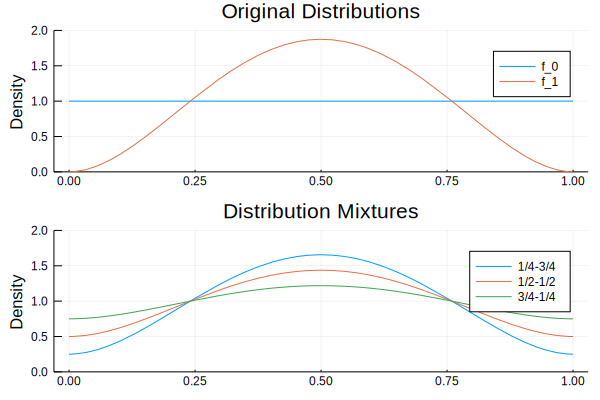

In [3]:
using StatsPlots

begin
    base_dist = [Beta(1, 1), Beta(3, 3)]
    mixed_dist = MixtureModel.(Ref(base_dist), (p -> [p, one(p) - p]).(0.25:0.25:0.75))
    plot(plot(base_dist, labels = ["f_0", "f_1"], title = "Original Distributions"),
         plot(mixed_dist, labels = ["1/4-3/4", "1/2-1/2", "3/4-1/4"],
              title = "Distribution Mixtures"),
         # Configurações globais nos dois gráficos
         ylab = "Density", ylim = (0, 2), layout = (2, 1)
         )
end

### Perdas e custos

Após observar $ z_k, z_{k-1}, \ldots, z_0 $, o tomador de decisão escolhe acima de três ações distintas:

- Ele decide que $ x = x_0 $ e não desenha mais $ z $’s.  
- Ele decide que $ x = x_1 $ e não desenha mais $ z $’s.  
- Ele adia a decisão de agora e prefere desenhar $ z_{k+1} $.  


Associado com essas três ações, o tomador de decisões pode sofrer três tipos de perdas:

- Uma perda $ L_0 $ se ele decidir que $ x = x_0 $ sendo que atualmente $ x=x_1 $.  
- Uma perda $ L_1 $ se ele decide que $ x = x_1 $ quando atualmente $ x=x_0 $.  
- Um custo $ c $ caso ele adie a decisão de agora e prefira desenhar $ z $.  

### Digressão em erros do tipo I e II

Se nós considerarmos  $ x=x_0 $ como uma hipótese nula e $ x=x_1 $ como uma hipótese alternartiva, então $ L_1 $ e $ L_0 $ são perdas associadas com dois tipos de erros estatísticos:

- Um erro do tipo I é uma rejeição incorreta de uma verdadeira hipótese nula (um “falso positivo”); e  
- Um erro do tipo II é uma falha na rejeição de uma falsa hipótese nula (um “falso negativo”)  


Então, quando nós tratamos $ x=x_0 $ como hipótese nula:

- Podemos achar que $ L_1 $ é uma perda associada ao erro do tipo I; ou   
- Podemos achar que $ L_0 $ é uma perda associada ao erro do tipo II.

### Intuição

Vamos tentar supor que uma regra de decisão ótima pode parecer isso antes de irmos mais longe.

Suponnha algum ponto dado no tempo que $ p $ é próximo de 1.

Então, nossas crenças anteriores e as evidências até agora apontam fortemente para $ x = x_0 $.

Se, em outra mão, $ p $ é próximo a 0, então $ x = x_1 $ é pesadamente favorecido.

Finalmente, se $ p $ está no meio do intervalo entre $ [0, 1] $, então nós temos pouca informação em qualquer direção.

Esse raciocínio sugere uma regra de decisão tal como a mostrada na figura:

<img src="https://julia.quantecon.org/dynamic_programming/_static/figures/wald_dec_rule.png" style="width:70%;">
  
Como será visto, essa é a forma correta da regra de decisão.

O problema-chave é determinar os valores de $ \alpha, \beta $, os quais irão depender dos valores listados abaixo.

Você pode querer pausar nesse ponto e tentar predizer o impacto de um parâmetro tal como $ c $ ou $ L_0 $ em $ \alpha $ ou $ \beta $.

### Equação de Bellman

Seja $ J(p) $ a perda total para um tomador de decisão com crença atual $ p $ que escolhe otimamente.

Com um pouco de pensamento, você irá concordar que $ J $ deve satisfazer a equação de Bellman.


<a id='equation-new1'></a>
$$
J(p) =
    \min
    \left\{
        (1-p) L_0, \; p L_1, \;
        c + \mathbb E [ J (p') ]
    \right\} \tag{1}
$$

onde $ p' $ é uma variável aleatória definida por:


<a id='equation-wf-new2'></a>
$$
p' = \frac{ p f_0(z)}{ p f_0(z) + (1-p) f_1 (z) } \tag{2}
$$

quando $ p $ é fixo e $ z $ é extraído do melhor palpite atual, cuja distribuição $ f $ é definida por:


<a id='equation-wf-new3'></a>
$$
f(v) = p f_0(v) + (1-p) f_1 (v) \tag{3}
$$

Na equação de Bellman, a minimização tem mais de três ações:

1. Aceitas $ x_0 $;  
2. Aceitar $ x_1 $, e  
3. Adiar a decisão e desenhar novamente.  


Seja,


<a id='equation-new4'></a>
$$
A(p)
:= \mathbb E [ J (p') ] \tag{4}
$$

Então podemos representar a equação de Bellman como:


<a id='equation-new5'></a>
$$
J(p) =
\min \left\{ (1-p) L_0, \; p L_1, \; c + A(p) \right\} \tag{5}
$$

onde $ p \in [0,1] $.

Aqui:

- $ (1-p) L_0 $ é a perda esperada associada com o aceite;
  $ x_0 $ (isto é, o custo de executar um erro do tipo II);  
- $ p L_1 $ é a perda esperada associada com o aceite;
  $ x_1 $ (isto é, o custo de executar um erro do tipo I), e  
- $ c + A(p) $ é o custo esperado associado à mais uma extração $ z $.  


A regra de decisão ótima é caracterizada pos dois números $ \alpha, \beta \in (0,1) \times (0,1) $ que satisfazem:


<a id='equation-new6'></a>
$$
(1- p) L_0 < \min \{ p L_1, c + A(p) \}  \textrm { se } p \geq \alpha \tag{6}
$$

e


<a id='equation-new7'></a>
$$
p L_1 < \min \{ (1-p) L_0,  c + A(p) \} \textrm { se } p \leq \beta \tag{7}
$$

Logo, a regra dee decisão ótima é;


<a id='equation-new8'></a>
$$
\begin{aligned}
\textrm { aceita } x=x_0 \textrm{ se } p \geq \alpha \\
\textrm { aceita } x=x_1 \textrm{ se } p \leq \beta \\
\textrm { extrai outra }  z \textrm{ se }  \beta \leq p \leq \alpha
\end{aligned} \tag{8}
$$

Nosso alvo é computar o valor da função $ J $, e a partir dele os pontos de corte associados $ \alpha $ e $ \beta $.

Uma aproximação sensível é escrever os três componentes de $ J $ que aparecem no lado direito da equação de Bellman como funções separadas.

Depois, a execução disso nos ajudará a obedecer a regra de ouro da codificação: **the don’t repeat yourself (DRY)**.

## Implementação

Vamos  codificar esse problema e resolvê-lo.

Nós implementamos as funções custo para cada escolha considerada na equação de Bellman [(7)](https://julia.quantecon.org/../dynamic_programming_squared/dyn_stack.html#equation-new3).

Primeiro, considere o custo de aceitar qualquer distribuição e comparar o mínimo de dois benefícios esperados de uma nova extração.

Extrair novamente irá valer a pena somente se o benefício marginal esperado de aprender a partir de uma extração adicional é maior que o custo explícito.

Para toda crença $ p $, nós podemos computar a diferença entre aceitar uma distribuição e escolher desenhar novamente.

A solução $ \alpha $, $ \beta $ ocorre em pontos diferentes.

Defina a função de custo como o mínimo das diferenças aos pares no custo entre as escolhas.

Então nós podemos encontrar pontos de indiferença quando a função custo for zero.

Podemos usar quaçquer algorítimo de função de raízes e resolver para as soluções no intervalo [0, 1].

Por fim, verifique quais os pontos de indiferença correspondentes à definição de uma transição permanente entre aceitar ou rejeitar o espaço para cada escolha.

Aqui está o código:

In [4]:
accept_x0(p, L0) = (one(p) - p) * L0
accept_x1(p, L1) = p * L1
bayes_update(p, d0, d1) = p * pdf(d0, p) / pdf(MixtureModel([d0, d1], [p, one(p) - p]), p)
function draw_again(p, d0, d1, L0, L1, c, target)
    candidate = 0.0
    cost = 0.0
    while candidate < target
        p = bayes_update(p, d0, d1)
        cost += c
        candidate = min(accept_x0(p, L0), accept_x1(p, L1)) + cost
        if candidate >= target
            break
        end
        target = candidate
    end
    return candidate
end
function choice(p, d0, d1, L0, L1, c)
    if isone(p)
        output = (1, 0)
    elseif iszero(p)
        output = (2, 0)
    elseif zero(p) < p < one(p)
        target, option = findmin([accept_x0(p, L0), accept_x1(p, L1)])
        candidate = draw_again(p, d0, d1, L0, L1, c, target)
        if candidate < target
            target, option = (candidate, 3)
        end
        output = (option, target)
    else
        throw(ArgumentError("p must be ∈ [0, 1]"))
    end
    return output
end

choice (generic function with 1 method)

Em seguida, resolveremos um probelma encontrando os valores de α, β para a regra de decisão.

In [5]:
function decision_rule(d0, d1, L0, L1, c)
    function cost(p, d0, d1, L0, L1, c)
        if c < zero(c)
            throw(ArgumentError("Cost must be non-negative"))
        end
        x0 = accept_x0(p, L0)
        x1 = accept_x1(p, L1)
        draw = draw_again(p, d0, d1, L0, L1, c, min(x0, x1))
        output = min(abs(draw - x0), abs(draw - x1), abs(x1 - x0))
        return output
    end
    # Encontre os pontos de indiferença
    roots = find_zeros(p -> cost(p, d0, d1, L0, L1, c), 0 + eps(), 1 - eps())
    # Compute as escolhas de ambos os lados
    left = first.(choice.(roots .- eps(), d0, d1, L0, L1, c))
    right = first.(choice.(roots .+ eps(), d0, d1, L0, L1, c))
    # Encontre β checando uma transição permanente da área de aceitação para
    # x₁ para nunca mais aceitar x₁ nos vários pontos de indiferença;
    # Encontre α verficando uma transição permanente da área de aceitação de
    # x₀ para não mais aceitar x₀ nos pontos de indiferença variados.
    β = findlast((left .== 2) .& (right .≠ 2)) |> (x -> isa(x, Int) ? roots[x] : 0)
    α = findfirst((left .≠ 1) .& (right .== 1)) |> (x -> isa(x, Int) ? roots[x] : 1)
    if β < α
        @printf("Accept x1 if p ≤ %.2f\nContinue to draw if %.2f ≤ p ≤ %.2f
                \nAccept x0 if p ≥ %.2f", β, β, α, α)
    else
        x0 = accept_x0(β, L0)
        x1 = accept_x1(β, L1)
        draw = draw_again(β, d0, d1, L0, L1, c, min(x0, x1))
        if draw == min(x0, x1, draw)
            @printf("Accept x1 if p ≤ %.2f\nContinue to draw if %.2f ≤ p ≤ %.2f
                    \nAccept x0 if p ≥ %.2f", β, β, α, α)
        else
            @printf("Accept x1 if p ≤ %.2f\nAccept x0 if p ≥ %.2f", β, α)
        end
    end
    return (α, β)
end

decision_rule (generic function with 1 method)

Nós podemos simular um agente de cara com um problema, e a solução com a segunte função:

In [ ]:
function simulation(problem)
    @unpack d0, d1, L0, L1, c, p, n, return_output = problem
    α, β = decision_rule(d0, d1, L0, L1, c)
    outcomes = fill(false, n)
    costs = fill(0.0, n)
    trials = fill(0, n)
    for trial in 1:n
        # Natureza escolhe
        truth = rand(1:2)
        # As verdadeiras ditribuição e perdas são definidas com base na verdade
        d = (d0, d1)[truth]
        l = (L0, L1)[truth]
        t = 0
        choice = 0
        while iszero(choice)
            t += 1
            outcome = rand(d)
            p = bayes_update(p, d0, d1)
            if p <= β
                choice = 1
            elseif p >= α
                choice = 2
            end
        end
        correct = choice == truth
        cost = t * c + (correct ? 0 : l)
        outcomes[trial] = correct
        costs[trial] = cost
        trials[trial] = t
    end
    @printf("\nCorrect: %.2f\nAverage Cost: %.2f\nAverage number of trials: %.2f",
            mean(outcomes), mean(costs), mean(trials))
    return return_output ? (α, β, outcomes, costs, trials) : nothing
end

Problem = @with_kw (d0 = Beta(1,1), d1 = Beta(9,9),
                    L0 = 2, L1 = 2,
                    c = 0.2, p = 0.5,
                    n = 100, return_output = false);

In [ ]:
Random.seed!(0);
simulation(Problem());

### Estática comparativa

Agora vamos considerar o exercício seguinte.

Nós dobramos o custo de extrair uma observação adicional.

Antes que você olhe, pense sobre o que irá acontecer:

- O tomador de decisão estará correto com mais ou menos frequência?  
- Irá ele tomar decisões cedo ou mais tarde?  

In [ ]:
Random.seed!(0);
simulation(Problem(c = 0.4));

Percebeu o que acontece?

O número médio de experimentos decresce.

O custo adicional por extração induziu o tomador de decisão à decidir por 0.18 menos processos em média.

Por ele decidir com pouca experiência, a porcentagem de tempo no qual ele está correto cai.

Isso leva ele a ter uma alta expectativa de perda quando ele coloca pesos iguais em ambos os modelos.

## Comparação com a formulação de Neyman-Pearson

Por várias razões, é útil descrever a teoria subjacente ao teste que o capitão da marinha G. S. Schuyler havia sido instruído a usar e que o levou a abordar Milton Friedman e Allan Wallis para transmitir sua suposição de que existiam procedimentos práticos superiores.

Evidentemente, a Marinha havia dito a Captail Schuyler para usar o que sabia ser um teste de Neyman-Pearson de última geração.

Contamos com o elegante sumário da teoria de Neyman-Pearson feito por Abraham Wald [[Wal47]](https://julia.quantecon.org/../zreferences.html#wald47).

Para nossos propósitos, observe os recursos da configuração:

- Assumir que há um tamanho simples e *fixo* $ n $;  
- A aplicação da lei dos grandes números, condicionada à modelos alternativos de probabilidade, para interpretar as probabilidades $ \alpha $ e $ \beta $ definidas na teoria de Neyman-Pearson.  


Lembre-se de que na formulação analítica sequencial acima:

- O tamanho simples $ n $ não é fixo mas sim um objeto a ser escolhido; tecnicamente $ n $ é uma variável aleatória.  
- Os parâmetros $ \beta $ e $ \alpha $ caracterizam regras de corte usadas para determinar $ n $ como uma variável aleatória.
- Leis dos grandes números não aparecem na construção sequencial.  


No capítulo 1 de **Sequential Analysis** [[Wal47]](https://julia.quantecon.org/../zreferences.html#wald47) Abraham Wald sumariza a apriximação de Neyman-Pearson ao teste de hipóteses.

Wald filtra o problema como tomar uma decisão sobre uma distribuição de probabilidade que é parcialmente conhecida.

(você deverá assumir que *algo* já é conhecido a fim de indicar um problema bem colocado. Usualmente, *algo* significa *um bocado*.)

Limitando o que é desconhecido, Wald usa a simples estrutura abaixo para ilustrar as principais idéias.

- Um tomador de decisão quer decidir qual das duas distribuições $ f_0 $, $ f_1 $ governa uma variável aleatória i.i.d. $ z $. 
- A hipótese nula $ H_0 $ é a afirmação que $ f_0 $ governa os dados.  
- Já a hipótese alternativa $ H_1 $ é a afirmação que $ f_1 $ governa os dados.  
- O problema é conceber e analisar um teste de hipótese $ H_0 $ contra uma hipótese alternativa $ H_1 $ com base na amostra de um número fixo $ n $ com observações independentes $ z_1, z_2, \ldots, z_n $ da variável aleatória $ z $.  


Para citar Abraham Wald,

- Um procedimento de teste que leva à aceitação ou rejeição da hipótese em questão é simplesmente uma regra que especifica, para cada amostra possível de tamanho $ n $, se a hipótese deve ser aceita ou rejeitada com base na amostra. Isso também pode ser expresso da seguinte maneira: Um procedimento de teste é simplesmente uma subdivisão da totalidade de todas as amostras possíveis de tamanho $ n $ em duas partes mutuamente exclusivas, por exemplo, parte 1 e parte 2, juntamente com a aplicação da regra de que a hipótese ser aceito se a amostra observada estiver contida na parte 2. A parte 1 também é chamada de região crítica. Como a parte 2 é a totalidade de todas as amostras de tamanho 2 que não estão incluídas na parte 1, a parte 2 é determinada exclusivamente pela parte 1. Portanto, escolher um procedimento de teste é equivalente a determinar uma região crítica.  


Escutemos mais de Wald:

- Como base para a escolha entre regiões críticas, Neyman e Pearson avançaram com as seguintes considerações: Ao aceitar ou rejeitar $ H_0 $, podemos cometer erros de dois tipos. Cometemos um erro do primeiro tipo se rejeitarmos $ H_0 $ quando for verdade; cometeremos um erro do segundo tipo se aceitarmos $ H_0 $ quando $ H_1 $ for verdadeiro. Após uma região crítica específica ter sido escolhida $ W $, a probabilidade de cometer um erro do primeiro tipo, bem como a probabilidade de cometer um erro do segundo tipo, é determinada exclusivamente. A probabilidade de cometer um erro do primeiro tipo é igual à probabilidade, determinada pela suposição de que $ H_0 $ é verdadeiro, que a amostra observada será incluída na região crítica $ W $. A probabilidade de cometer um erro do segundo tipo é igual à probabilidade, determinada no pressuposto de que $ H_1 $ é verdadeiro, que a probabilidade cairá fora da região crítica $ W $. Para qualquer região crítica $ W $, denotaremos a probabilidade de um erro do primeiro tipo em $ \alpha $ e a probabilidade de um erro do segundo tipo em $ \beta $.


Agora vejamos cuidadosamente como Wald aplica uma lei dos grandes números para interpretar $ \alpha $ and $ \beta $:

- As probabilidades $ \alpha $ e $ \beta $ têm a seguinte interpretação prática importante: Suponha que extraimos um grande número de amostras de tamanho $ n $. Seja $ M $ o número de amostras retiradas. Suponha que, para cada uma dessas amostras de $ M $, rejeitemos $ H_0 $ se a amostra estiver incluída em $ W $ e aceitemos $ H_0 $ se a amostra estiver fora de $ W $. Dessa forma, fazemos declarações de rejeição ou aceitação de $ M $. Algumas dessas afirmações geralmente estão erradas. Se $ H_0 $ for verdadeiro e se $ M $ for grande, a probabilidade é de quase $ 1 $ (ou seja, é praticamente certo) que a proporção de declarações erradas (ou seja, o número de declarações erradas divididas por $ M $) será ser aproximadamente $ \alpha $. Se $ H_1 $ for verdadeiro, a probabilidade é quase $ 1 $ de que a proporção de declarações erradas seja aproximadamente $ \beta $. Assim, podemos dizer que, a longo prazo [aqui Wald aplica uma lei de grandes números, gerando $ M \rightarrow \infty $ (nosso comentário, não o de Wald)] a proporção de afirmações erradas será $ \alpha $ se $ H_0 $ é verdadeiro e $ \beta $ se $ H_1 $ for verdadeiro.

A quantidade $ \alpha $ é chamada de *tamanho* da região crítica, e a quantidade $ 1-\beta $ é denominada de *poder* da região crítica.

Wald nota que:

- uma região crítica $ W $ é mais desejável que outra se tiver valores menores de $ \alpha $ e $ \beta $. Embora $ \alpha $ ou $ \beta $ possam ser arbitrariamente pequenos por uma escolha adequada da região crítica $ W $, é possível tornar $ \alpha $ e $ \beta $ arbitrariamente pequenos para um valor fixo de $ n $, ou seja, um tamanho fixo de amostra.

Wald sumariza a configuração de Neyman e Pearson da seguinte forma:

- Neyman e Pearson mostraram que uma região que consistia nas amostras:
  $ (z_1, z_2, \ldots, z_n) $ a qual satisfazia a desigualdade  
  $$
  \frac{ f_1(z_1) \cdots f_1(z_n)}{f_0(z_1) \cdots f_1(z_n)} \geq k
  $$
 é uma região crítica mais poderosa para testar a hipótese
   $ H_0 $ contra a hipótese alternativa $ H_1 $. O termo
   $ k $ no lado direito é uma constante escolhida para que a região
   terá o tamanho necessário $ \alpha $.  

Wald continua discutindo o conceito de Neyman e Pearson de teste *uniformemente mais poderoso*.

Aqui está como Wald introduz a noção de teste sequencial:

- Uma regra é dada para tomar uma das três decisões a seguir em qualquer estágio do experimento (no m-ésimo teste para cada valor integral de m): (1) aceitar a hipótese H, (2) rejeitar a hipótese H, (3) para continuar o experimento fazendo uma observação adicional. Assim, esse procedimento de teste é realizado sequencialmente. Com base na primeira observação, é tomada uma das decisões acima mencionadas. Se a primeira ou a segunda decisão for tomada, o processo será encerrado. Se a decisão é tomada, um segundo julgamento é realizado. Novamente, com base nas duas primeiras observações, uma das três decisões é tomada. Se a terceira decisão for tomada, um terceiro julgamento será realizado e assim por diante. O processo continua até que a primeira ou a segunda decisão seja tomada. O número n de observações exigido por esse procedimento de teste é uma variável aleatória, pois o valor de n depende do resultado das observações.

**Notas de rodapé**

<p><a id=f1 href=#f1-link><strong>[1]</strong></a> Dado que o tomador de decisão crê que $ z_{k+1} $ é extraído de uma mistura de duas distribuições i.i.d, ele não acredita que a sequência $ [z_ {k + 1}, z_ {k + 2}, \ldots] $ seja i.i.d.
Em vez disso, ele acredita que é permutável. Veja [[Kre88]](https://julia.quantecon.org/../zreferences.html#kreps88)
capítulo 11, para uma discussão de permutabilidade.